In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

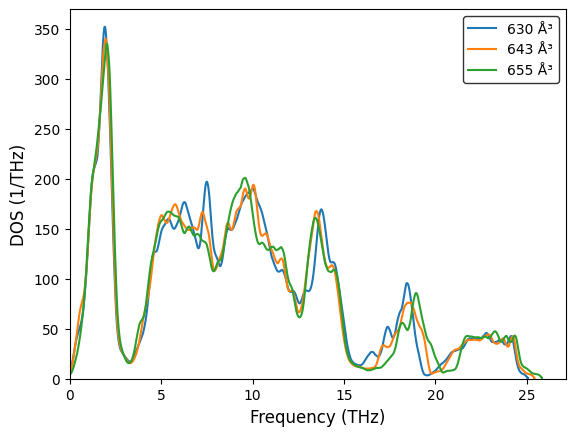

In [17]:
# Plot and compare phonon DOS

# Read in data
vdos_1 = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_2.00')
vdos_2 = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_3.00')
vdos_3 = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_4.00')
#vdos_4 = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_5.00')

# Plot data
plt.plot(vdos_1[:,0] * 1e-12, vdos_1[:,1] / 1e-12 * 150, label='630' + ' Å³')
plt.plot(vdos_2[:,0] * 1e-12, vdos_2[:,1] / 1e-12 * 150, label='643' + ' Å³')
plt.plot(vdos_3[:,0] * 1e-12, vdos_3[:,1] / 1e-12 * 150, label='655' + ' Å³')
#plt.plot(vdos_4[:,0] * 1e-12, vdos_4[:,1] / 1e-12 * 150, label='677' + ' Å³')
plt.xlabel('Frequency (THz)', fontsize=12)
plt.ylabel('DOS (1/THz)', fontsize=12)
plt.legend(edgecolor='black')
plt.xlim(0)
plt.ylim(0)
# Save a high resolution image
plt.savefig('180DW_phonon_dos.png', dpi=300)

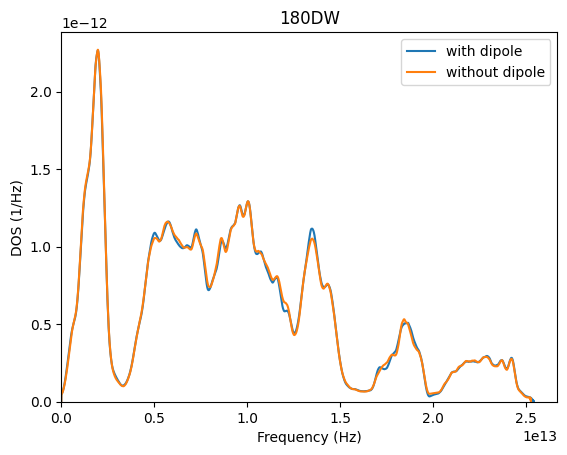

In [118]:
# Plot and compare the phonon DOS with and without the dipole correction

# Read in data
with_dipole = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_3.00')
without_dipole = np.loadtxt('180DW/without_dipole/scaled_phonon_dos/vdos_3.00')

# Plot the data
plt.plot(with_dipole[:,0], with_dipole[:,1], label='with dipole')
plt.plot(without_dipole[:,0], without_dipole[:,1], label='without dipole')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.xlim(0)
plt.ylim(0)        
plt.title('180DW')

# Save a high resolution image
plt.savefig('180DW_phonon_dos_with_and_without_dipole.png', dpi=300)

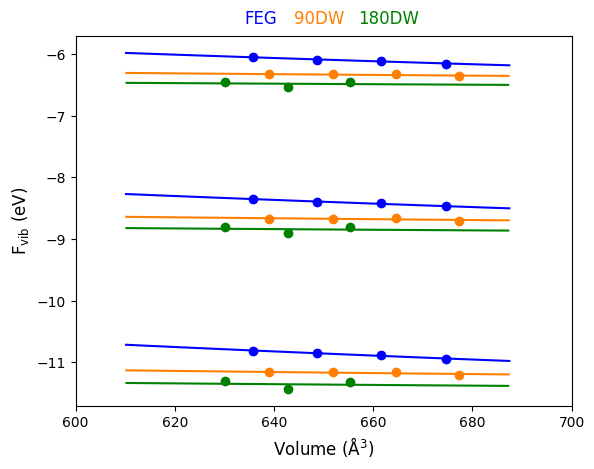

In [10]:
# Plot Fvib vs. volume for fixed T

# Read in data
out1_fvib = np.loadtxt('out1_fvib')
out1_fvib_fit = np.loadtxt('out1_fvib_fit')
out1_volume_structures = np.loadtxt('out1_volume_structures')
out1_volume_structures_fit = np.loadtxt('out1_volume_structures_fit')
out2_fvib = np.loadtxt('out2_fvib')
out2_fvib_fit = np.loadtxt('out2_fvib_fit')
out2_volume_structures = np.loadtxt('out2_volume_structures')
out2_volume_structures_fit = np.loadtxt('out2_volume_structures_fit')
out3_fvib = np.loadtxt('out3_fvib')
out3_fvib_fit = np.loadtxt('out3_fvib_fit')
out3_volume_structures = np.loadtxt('out3_volume_structures')
out3_volume_structures_fit = np.loadtxt('out3_volume_structures_fit')

T = [69, 79, 89]
plt.plot(out1_volume_structures[:, T]*50, out1_fvib[:, T]*50, 'bo')
plt.plot(out1_volume_structures_fit[6:-20, T]*50, out1_fvib_fit[6:-20, T]*50, 'b')

plt.plot(out2_volume_structures[:, T]*50, out2_fvib[:, T]*50, 'o', color=(1, 0.5, 0))
plt.plot(out2_volume_structures_fit[3:-23, T]*50, out2_fvib_fit[3:-23, T]*50, '-', color=(1, 0.5, 0))

plt.plot(out3_volume_structures[:, T]*50, out3_fvib[:, T]*50, 'go')
plt.plot(out3_volume_structures_fit[13:-1, T]*50, out3_fvib_fit[13:-1, T]*50, 'g')
plt.xlabel(r'Volume (Å$^3$)', fontsize=12)
plt.ylabel(r'$\mathrm{F_{vib}}$ (eV)', fontsize=12)
plt.xlim(600, 700)

# Add text labels
plt.text(634, -5.5, 'FEG', color='blue', fontsize=12)
plt.text(644, -5.5, '90DW', color=(1, 0.5, 0), fontsize=12)
plt.text(657, -5.5, '180DW', color='green', fontsize=12)

# Save a high resolution image
plt.savefig('Fvib_vs_volume.png', dpi=300)
plt.show()

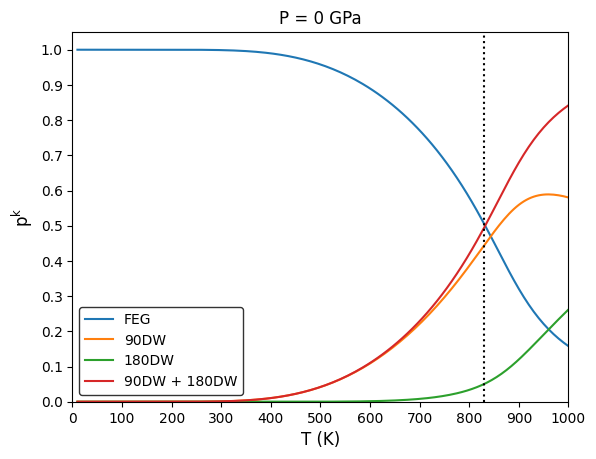

In [20]:
# Plot zentropy properties
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]

zentropy_properties = np.loadtxt('property_PF')

# Plot the results
plt.plot(zentropy_properties[:,0], zentropy_properties[:,12], label='FEG')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13], label='90DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,14], label='180DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13]+zentropy_properties[:,14], label='90DW + 180DW')
plt.legend(edgecolor='black')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{p^{k}}$', fontsize=12)
plt.xlim(0, 1000)
plt.ylim(0)
plt.title('P = 0 GPa')

xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);

ylim = plt.gca().get_ylim()
ticks = np.arange(0, 1.1, 0.1)
plt.yticks(ticks);

plt.axvline(x=830, color='black', linestyle=':')

# Save a high resolution image
plt.savefig('probability_vs_T.png', dpi=300)

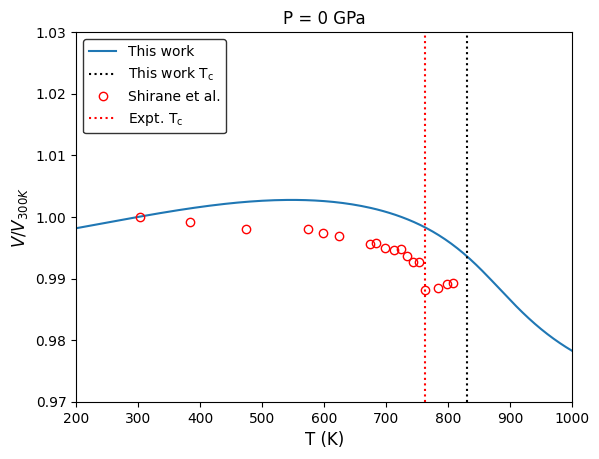

In [22]:
# Plot equilibrium volume vs T
plt.plot(zentropy_properties[:,0], zentropy_properties[:,1]/zentropy_properties[58,1], label = 'This work')
plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')

expt_T = np.array([303.15, 383.15, 473.15, 573.15, 598.15, 623.15, 673.15, 683.15, 698.15, 713.15, 723.15, 733.15, 743.15, 753.15, 763.15, 783.15, 798.15, 808.15])
expt_v = np.array([62.77, 62.72, 62.65, 62.65, 62.61, 62.58, 62.49, 62.5, 62.45, 62.43, 62.44, 62.37, 62.31, 62.31, 62.03, 62.05, 62.09, 62.1])
plt.plot(expt_T, expt_v/expt_v[0], 'o', color='red', markerfacecolor='none', label = 'Shirane et al.')
plt.axvline(x=763, color='red', linestyle=':', label = r'Expt. $\mathrm{T_{c}}$')

plt.xlim(200, 900)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.ylim(0.97, 1.03)

plt.xlabel('T (K)', fontsize=12)
#plt.ylabel(r'Unit Cell Volume ($\mathrm{\AA^3}$)', fontsize=12);
plt.ylabel(r'$V/V_{300 K}$', fontsize=12);
plt.legend(edgecolor='black')

# Save a high resolution image
plt.savefig('volume_vs_T.png', dpi=300)

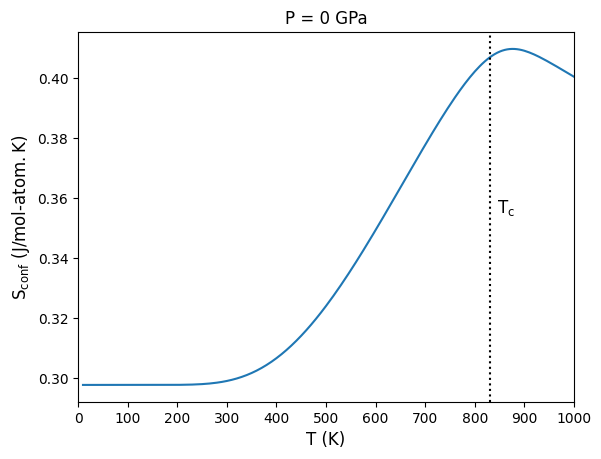

In [47]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot Sconf vs T

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 6]/50 * 1.60218e-19 * 6.02e23)
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{S_{conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
plt.text(880, plt.gca().get_ylim()[1]-0.06, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)

# Save a high resolution image
plt.savefig('Sconf_vs_T.png', dpi=300)

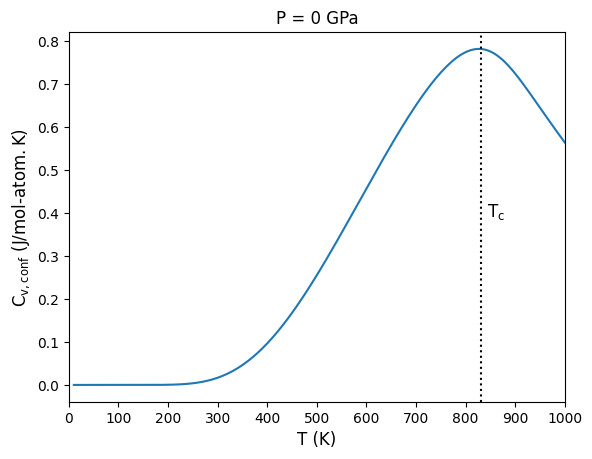

In [55]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot Cv,conf vs T

plt.plot(zentropy_properties[:,0], zentropy_properties[:, 7]/50 * 1.60218e-19 * 6.02e23)
plt.xlim(0, 1000)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{C_{v,conf} \ (J/mol\text{-}atom.K)}$', fontsize=12);
plt.text(880, plt.gca().get_ylim()[1]-0.43, r'$\mathrm{T_{c}}$', ha='right', fontsize=12)

# Save a high resolution image
plt.savefig('Cvconf_vs_T.png', dpi=300)